In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import nltk
import os

In [ ]:
nltk.download()

In [4]:
folder_path = '/content/drive/MyDrive/CSE 419/Lab Assign-4/1000_documents'

In [5]:
file_names = os.listdir(folder_path)
file_names

['business_11.txt',
 'business_19.txt',
 'business_13.txt',
 'business_17.txt',
 'business_14.txt',
 'business_16.txt',
 'business_15.txt',
 'business_2.txt',
 'business_10.txt',
 'business_1.txt',
 'business_18.txt',
 'business_12.txt',
 'business_100.txt',
 'business_32.txt',
 'business_24.txt',
 'business_30.txt',
 'business_44.txt',
 'business_36.txt',
 'business_20.txt',
 'business_22.txt',
 'business_4.txt',
 'business_29.txt',
 'business_26.txt',
 'business_27.txt',
 'business_39.txt',
 'business_28.txt',
 'business_33.txt',
 'business_35.txt',
 'business_37.txt',
 'business_31.txt',
 'business_23.txt',
 'business_3.txt',
 'business_34.txt',
 'business_43.txt',
 'business_45.txt',
 'business_25.txt',
 'business_21.txt',
 'business_42.txt',
 'business_41.txt',
 'business_40.txt',
 'business_38.txt',
 'business_50.txt',
 'business_67.txt',
 'business_68.txt',
 'business_51.txt',
 'business_55.txt',
 'business_69.txt',
 'business_46.txt',
 'business_53.txt',
 'business_57.txt',
 'b

In [6]:
documents = []
for file_name in file_names:
  file_path = os.path.join(folder_path,file_name)
  with open(file_path,'r') as file:
    content = file.read()
    documents.append(content)

In [7]:
len(documents)

1000

### Task 1 : Text Preprocessing

In the preprocessing stage, the following steps were applied to clean and prepare the text data for analysis:

1. **Lowercasing**

2. **Removal of Numbers**

3. **Removal of Punctuation and Special Characters**

4. **Tokenization**

5. **Stopwords Removal**

6. **Lemmatization**


In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [9]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [13]:
unique_tokens = set()
def preprocess_text(text):
  text = text.lower()
  text= re.sub(r'\d+','',text)
  text = re.sub(r'\W',' ',text)
  tokens = word_tokenize(text)
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  unique_tokens.update(tokens)
  return tokens

In [14]:
processed_docs =[preprocess_text(doc) for doc in documents]

In [15]:
len(processed_docs[0])

348

In [16]:
len(unique_tokens)

24081

### Task 02: Calculation of TF, IDF, and TF-IDF Matrix



In [17]:
import math
import numpy as np
import pandas as pd
from collections import Counter

In [23]:
N = len(processed_docs)
N

1000

### 1. Term Frequency (TF)

The term frequency measures how frequently a term appears in a document, normalized by the total number of terms in that document. The formula is:

$$
TF(t, d) = \frac{\text{Count of term } t \text{ in document } d}{\text{Total number of terms in document } d}
$$

This ensures that longer documents do not have higher term frequencies just because they contain more words.

---


In [24]:
# Calculate Term Frequency (TF)
def compute_tf(doc):
    tf = Counter(doc)
    doc_len = len(doc)
    for term in tf:
        tf[term] = tf[term] / doc_len
    return tf

In [28]:
tf_matrix = [compute_tf(doc) for doc in processed_docs]

In [30]:
tf_matrix[0]

Counter({'saab': 0.022988505747126436,
         'build': 0.008620689655172414,
         'cadillacs': 0.005747126436781609,
         'sweden': 0.014367816091954023,
         'general': 0.0028735632183908046,
         'motor': 0.005747126436781609,
         'world': 0.0028735632183908046,
         'largest': 0.0028735632183908046,
         'car': 0.034482758620689655,
         'maker': 0.011494252873563218,
         'confirmed': 0.0028735632183908046,
         'new': 0.008620689655172414,
         'medium': 0.005747126436781609,
         'sized': 0.005747126436781609,
         'cadillac': 0.011494252873563218,
         'bls': 0.0028735632183908046,
         'loss': 0.008620689655172414,
         'making': 0.005747126436781609,
         'factory': 0.014367816091954023,
         'unveiled': 0.005747126436781609,
         'geneva': 0.0028735632183908046,
         'show': 0.0028735632183908046,
         'intended': 0.0028735632183908046,
         'compete': 0.0028735632183908046,
         'l

### 2. Inverse Document Frequency (IDF):
The inverse document frequency measures how important a term is across all documents. A term that appears in many documents has a lower IDF score, as it is less informative. The formula is:
$$
IDF(t, D) = \log \left( \frac{N}{DF(t)} \right)
$$

Where:
- \( N \) is the total number of documents.
- \( DF(t) \) is the number of documents in which the term \( t \) appears.


In [26]:
# Calculate Document Frequency (DF) and Inverse Document Frequency (IDF)
def compute_idf(vocabulary, docs):
    idf = {}
    for term in vocabulary:
        df = sum([1 for doc in docs if term in doc])
        idf[term] = math.log(N / (df + 1))  # Add 1 to avoid division by zero
    return idf

In [41]:
vocabulary = list(unique_tokens)
idf = compute_idf(vocabulary, processed_docs)

In [42]:
print({term: idf[term] for term in list(vocabulary)[:10]})

{'bodied': 6.214608098422191, 'discounting': 6.214608098422191, 'dnet': 5.809142990314028, 'partner': 4.199705077879927, 'cunningham': 5.521460917862246, 'current': 2.501036031717884, 'kingship': 5.115995809754082, 'ditched': 6.214608098422191, 'extruded': 6.214608098422191, 'april': 2.6036901857779675}


### 3. TF-IDF Calculation

Finally, the TF-IDF score for each term \( t \) in a document \( d \) is calculated as the product of its TF and IDF:

$$
TF\text{-}IDF(t, d) = TF(t, d) \times IDF(t, D)
$$

This formula combines both term frequency and document rarity, allowing you to rank terms based on their importance to a document in relation to the entire corpus.

---


In [43]:
# Create the TF-IDF matrix
def compute_tfidf(processed_docs, vocabulary, idf):
    tfidf_matrix = []

    for doc in processed_docs:
        tf = compute_tf(doc)  # Calculate TF for the current document
        tfidf_doc = []
        for term in vocabulary:
            # Multiply TF by IDF to get TF-IDF
            tfidf_value = tf.get(term, 0) * idf.get(term, 0)
            tfidf_doc.append(tfidf_value)
        tfidf_matrix.append(tfidf_doc)

    return np.array(tfidf_matrix)

In [44]:
tfidf_matrix = compute_tfidf(processed_docs, vocabulary, idf)

In [46]:
tfidf_matrix[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
def cosine_similarity(matrix):
    norm = np.linalg.norm(matrix, axis=1)
    similarity_matrix = np.dot(matrix, matrix.T) / (norm[:, None] * norm[None, :])
    return similarity_matrix

In [49]:
similarity_matrix = cosine_similarity(tfidf_matrix)

In [50]:
similarity_matrix

array([[1.        , 0.01877103, 0.05905498, ..., 0.01559339, 0.01500708,
        0.02125415],
       [0.01877103, 1.        , 0.01889169, ..., 0.00573814, 0.0115833 ,
        0.01980476],
       [0.05905498, 0.01889169, 1.        , ..., 0.02720516, 0.01607856,
        0.01615204],
       ...,
       [0.01559339, 0.00573814, 0.02720516, ..., 1.        , 0.02472308,
        0.02255458],
       [0.01500708, 0.0115833 , 0.01607856, ..., 0.02472308, 1.        ,
        0.04119332],
       [0.02125415, 0.01980476, 0.01615204, ..., 0.02255458, 0.04119332,
        1.        ]])

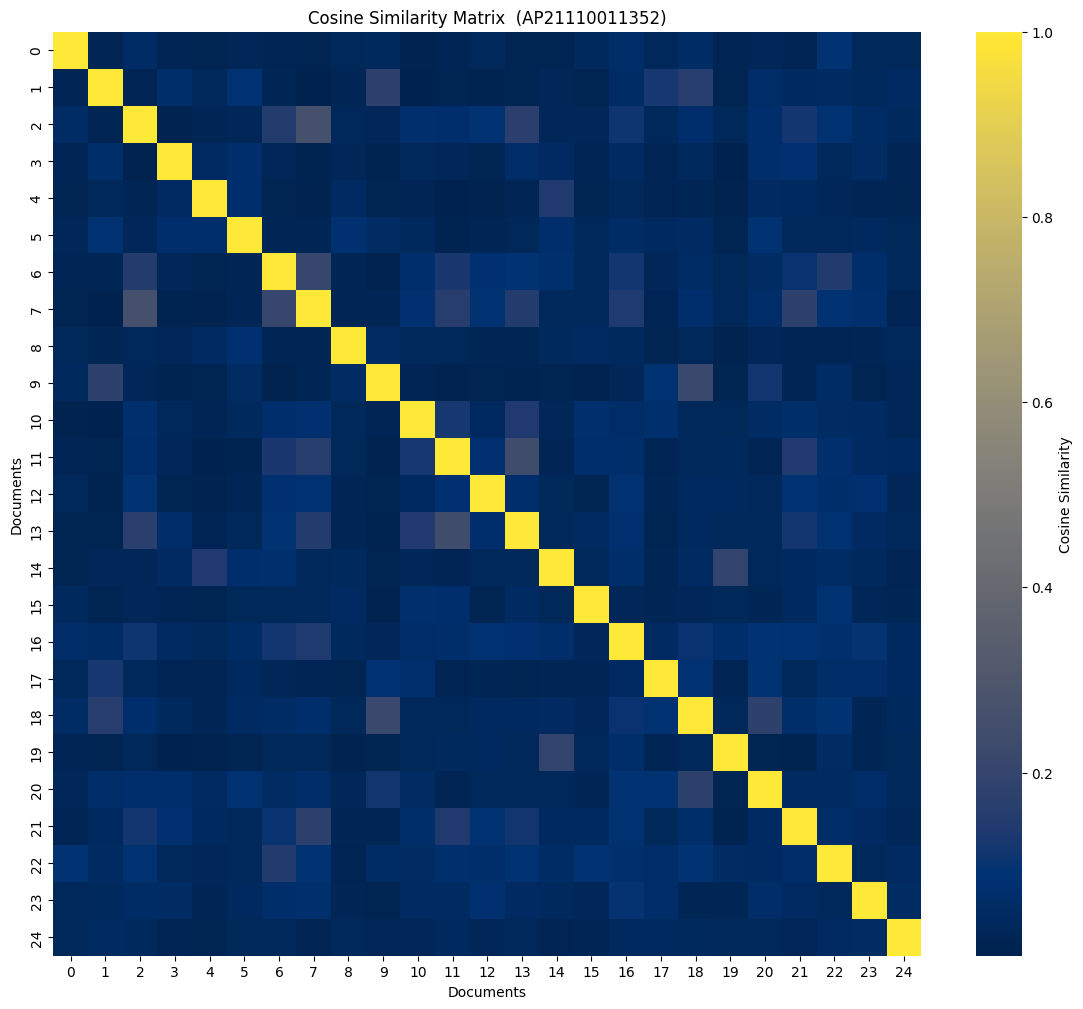

In [64]:
plt.figure(figsize=(14, 12))
sns.heatmap(similarity_matrix[:25, :25], cmap='cividis', cbar_kws={'label': 'Cosine Similarity'})
plt.title("Cosine Similarity Matrix  (AP21110011352)")
plt.xlabel("Documents")
plt.ylabel("Documents")
plt.show()